In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import folium
import seaborn as sns

sns.set()

## Let's have a look at the data:


Load data from all avalilable files and have a look into it. The main goal is really to see what file can be used for what purpose, what files are not interesting at all, what information can be found in particular files.

In [2]:
LOCATION = 'munich'

df_list = pd.read_csv(LOCATION + '/listings.csv.gz')
df_reviews = pd.read_csv(LOCATION + '/reviews.csv.gz')
df_cal = pd.read_csv(LOCATION + '/calendar.csv.gz')

df_list_sum = pd.read_csv(LOCATION + '/listings.csv')
df_reviews_sum = pd.read_csv(LOCATION + '/reviews.csv')
df_neib_sum = pd.read_csv(LOCATION + '/neighbourhoods.csv')

In [3]:
# set some pandas options in order to customize the readability of its outputs
pd.options.display.max_rows=10
pd.options.display.max_columns=None
pd.options.display.max_colwidth=30

___

### Check data about listings

#### First let's compare listings and listings_summary?

In [4]:
df_list

id                    listing_url       scrape_id last_scraped  \
0        97945  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
1       114695  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
2       127383  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
3       159634  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
4       170154  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
...        ...                            ...             ...          ...   
5068  48761022  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5069  48778478  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5070  48780743  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
5071  48780981  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5072  48797828  https://www.airbnb.com/roo...  20210322162337   2021-03-23   

                               name                    description  \
0     Deluxw-Apartm. with roof t...  <b>The space</b><br />We o...   
1     Apartment Munich/East with...  <b>The space</b><br />It´s...   
2     City apartment next to Pin...  <b>The space</b><br />My c...   
3     Fancy, bright central roof...  <b>The space</b><br />The ...   
4     Own floor & bath, parking ...  Enjoy a quiet neighbourhoo...   
...                             ...                            ...   
5068  Luxury Designer Apartment ...  The apartment is located w...   
5069  Apartment with Balcony in ...  Studio with balcony in cen...   
5070  Wunderschöne Wohnung in de...  <b>The space</b><br />Voll...   
5071  Entire apartment in the be...  Entire apartment in the be...   
5072  Fully- furnished, central ...  Central apartment in Munic...   

              neighborhood_overview                    picture_url    host_id  \
0     We are living in a outskir...  https://a0.muscache.com/pi...     517685   
1                               NaN  https://a0.muscache.com/pi...     581737   
2                               NaN  https://a0.muscache.com/pi...     630556   
3     Very quiet, green, squirre...  https://a0.muscache.com/pi...     765694   
4                               NaN  https://a0.muscache.com/pi...     108297   
...                             ...                            ...        ...   
5068  The street here is very al...  https://a0.muscache.com/pi...    5265984   
5069                            NaN  https://a0.muscache.com/pi...   54142901   
5070  Super zentral, alles zu Fu...  https://a0.muscache.com/pi...  317502651   
5071                            NaN  https://a0.muscache.com/pi...  161107012   
5072                            NaN  https://a0.muscache.com/pi...   48130242   

                           host_url   host_name  host_since  \
0     https://www.airbnb.com/use...    Angelika  2011-04-18   
1     https://www.airbnb.com/use...     Stephan  2011-05-12   
2     https://www.airbnb.com/use...       Sonja  2011-05-26   
3     https://www.airbnb.com/use...       Sanna  2011-07-01   
4     https://www.airbnb.com/use...        Alex  2010-04-14   
...                             ...         ...         ...   
5068  https://www.airbnb.com/use...      Daniel  2013-02-28   
5069  https://www.airbnb.com/use...      Silvia  2016-01-10   
5070  https://www.airbnb.com/use...  Maximilian  2019-12-14   
5071  https://www.airbnb.com/use...         Til  2017-12-03   
5072  https://www.airbnb.com/use...     Silvana  2015-11-04   

                      host_location                     host_about  \
0           Munich, Bayern, Germany  Ich freue mich auf viele i...   
1           Munich, Bayern, Germany  I am looking forward to me...   
2           Munich, Bayern, Germany  Hi, mein Name ist Sonja un...   
3           Munich, Bayern, Germany  outdoorsy sportive Person ...   
4           Munich, Bayern, Germany  We love to travel and drea...   
...                             ...                            ...   
5068       Mun

In [5]:
df_list_sum

id                           name    host_id   host_name  \
0        97945  Deluxw-Apartm. with roof t...     517685    Angelika   
1       114695  Apartment Munich/East with...     581737     Stephan   
2       127383  City apartment next to Pin...     630556       Sonja   
3       159634  Fancy, bright central roof...     765694       Sanna   
4       170154  Own floor & bath, parking ...     108297        Alex   
...        ...                            ...        ...         ...   
5068  48761022  Luxury Designer Apartment ...    5265984      Daniel   
5069  48778478  Apartment with Balcony in ...   54142901      Silvia   
5070  48780743  Wunderschöne Wohnung in de...  317502651  Maximilian   
5071  48780981  Entire apartment in the be...  161107012         Til   
5072  48797828  Fully- furnished, central ...   48130242     Silvana   

      neighbourhood_group          neighbourhood  latitude  longitude  \
0                     NaN                 Hadern  48.11476   11.48782   
1                     NaN           Berg am Laim  48.12071   11.63758   
2                     NaN            Maxvorstadt  48.15199   11.56482   
3                     NaN     Pasing-Obermenzing  48.13898   11.46612   
4                     NaN      Sendling-Westpark  48.10814   11.52733   
...                   ...                    ...       ...        ...   
5068                  NaN         Altstadt-Lehel  48.13442   11.58123   
5069                  NaN  Neuhausen-Nymphenburg  48.14534   11.54116   
5070                  NaN         Altstadt-Lehel  48.13545   11.57980   
5071                  NaN            Bogenhausen  48.14090   11.60640   
5072                  NaN          Au-Haidhausen  48.12652   11.58781   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt     80               2                129  2019-10-03   
1     Entire home/apt     95               2                 53  2019-10-06   
2     Entire home/apt     99               2                 94  2020-12-30   
3     Entire home/apt     52               5                 34  2020-12-23   
4        Private room     55               2                478  2020-11-13   
...               ...    ...             ...                ...         ...   
5068  Entire home/apt    120               1                  0         NaN   
5069  Entire home/apt     52              14                  0         NaN   
5070  Entire home/apt     68               7                  0         NaN   
5071  Entire home/apt     56              10                  0         NaN   
5072  Entire home/apt     30               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  1.12                              2                  5  
1                  0.45                              2                169  
2                  0.79                              1                  0  
3                  0.29                              1                  0  
4                  4.12                              1                275  
...                 ...                            ...                ...  
5068                NaN                              1                340  
5069                NaN                              1                 55  
5070                NaN                              1                 62  
5071                NaN                              1                325  
5072                NaN                              1                320  

[5073 rows x 16 columns]

___

#### Is there something in the listings_summary what is not in listings?

In [6]:
set(df_list_sum.columns) - set(df_list.columns)

{'neighbourhood_group'}

In [7]:
df_list_sum['neighbourhood_group'].isnull().all()

True

The difference is **neighbourhood_group** but we can ignore it, it has no values. I'll continue with listings and ignore the smaller summary file.

___

#### Plot a map for all listings in the city:

In [8]:
# Use Folium library to plot the GPS data on the map

coords=df_list[['latitude', 'longitude']].values.tolist()
loc_map = folium.Map(location=[df_list['latitude'].median(), df_list['longitude'].median()], zoom_start=11, tiles='cartodbpositron', width=640, height=480)
[folium.CircleMarker(coords[i], radius=0.0001, color='#0080bb').add_to(loc_map) for i in range(len(coords))]
loc_map

#### Yes, the listings are in Munich indeed.

___

### Check the distribution of listing over particular districts of the city:

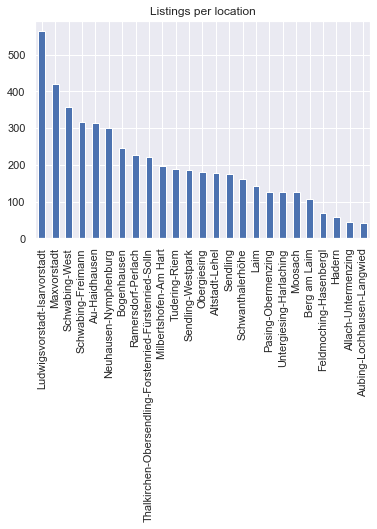

In [9]:
df_list['neighbourhood_cleansed'].value_counts().plot(kind='bar', title='Listings per location');

In [10]:
#check if some data is missing:
df_list.neighbourhood_cleansed.isnull().sum()

0

*neighbourhood_cleansed* looks to be exactly the right column to get the information regarding district.

___

### What kind of accomodation do we have?

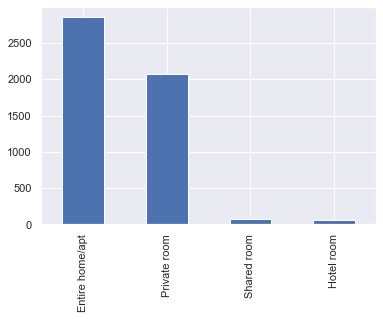

In [11]:
df_list['room_type'].value_counts().plot(kind='bar');

#### Most common property types:

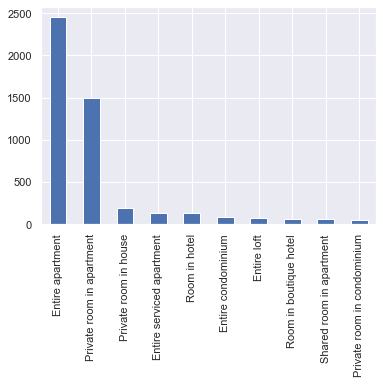

In [12]:
# top 10 common property types 
df_list['property_type'].value_counts()[:10].plot(kind='bar');

#### Least common property types. An adventure in the city?

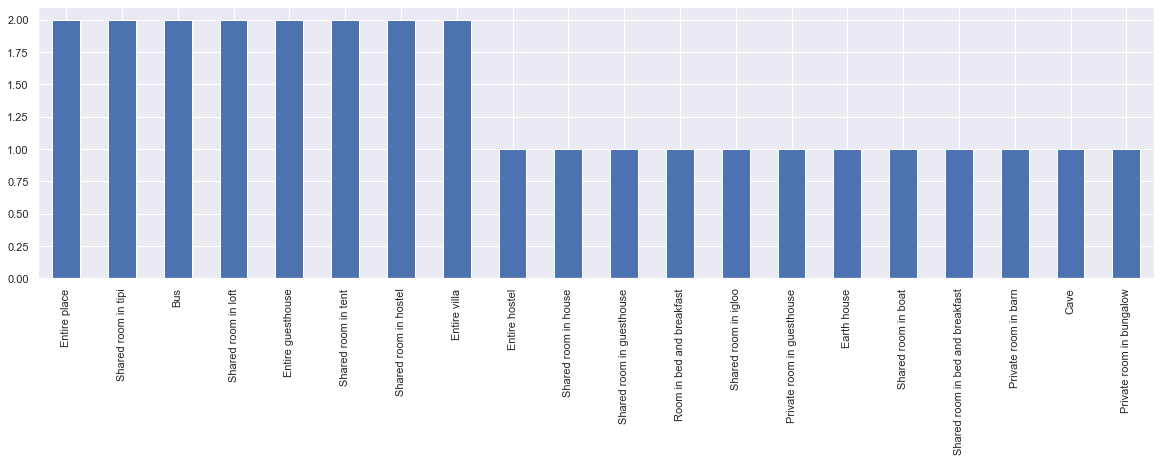

In [13]:
df_list['property_type'].value_counts()[-20:].plot(kind='bar', figsize=(20, 5));

**Yes, an earth house, a bus, a cave or a shared room in boat is something special indeed.**

___

### Check data about reviews

In [14]:
df_reviews

listing_id         id        date  reviewer_id       reviewer_name  \
0            97945     591337  2011-10-03       508190              Lauren   
1            97945     796084  2011-12-20       341171      Marty & Evelyn   
2            97945     964528  2012-03-02      1647967                 Sue   
3            97945    1353862  2012-05-26      2414638      Mel And George   
4            97945    1375610  2012-05-29      2323197               Anais   
...            ...        ...         ...          ...                 ...   
108237    48484031  738253130  2021-03-12     77190130              Thomas   
108238    48484031  740251194  2021-03-19    390516249         Elena Alina   
108239    48616567  742587243  2021-03-27    223550017  Masirullah Japaroo   
108240    48652509  740916531  2021-03-21     32192964                Joel   
108241    48707270  740919089  2021-03-21    393028570                Luis   

                             comments  
0       We very much enjoyed stayi...  
1       Angelika was a very gracio...  
2       The apartment was beautifu...  
3       We loved the warm welcome ...  
4       Dès notre arrivée, notre h...  
...                               ...  
108237           Alles war wunderbar.  
108238  It was very good very clea...  
108239  Sehr Gastfreundlich und re...  
108240  Reibungsloser Austausch vo...  
108241  Spacious, nice, some furni...  

[108242 rows x 6 columns]

In [15]:
df_reviews_sum

listing_id        date
0            97945  2011-10-03
1            97945  2011-12-20
2            97945  2012-03-02
3            97945  2012-05-26
4            97945  2012-05-29
...            ...         ...
108237    48484031  2021-03-12
108238    48484031  2021-03-19
108239    48616567  2021-03-27
108240    48652509  2021-03-21
108241    48707270  2021-03-21

[108242 rows x 2 columns]

In [16]:
set(df_reviews_sum.columns) - set(df_reviews.columns)

set()

In [17]:
pd.to_datetime(df_reviews.date).mean() == pd.to_datetime(df_reviews_sum.date).mean()

True

In [18]:
pd.to_datetime(df_reviews.listing_id).mean() == pd.to_datetime(df_reviews_sum.listing_id).mean()

True

**This looks like the reviews_sum file is a just a subset of the reviews file and we can ignore it.**

___

#### What is the reviews distrution over all users?

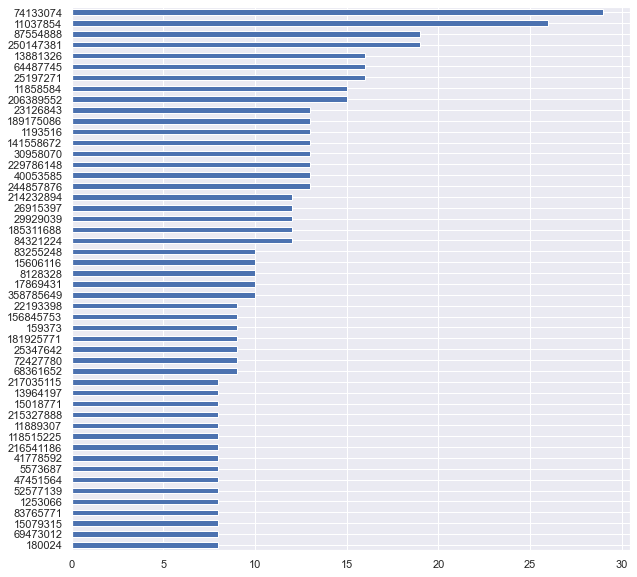

In [19]:
df_reviews['reviewer_id'].value_counts()[0:50].sort_values(ascending=True).plot.barh(figsize=(10, 10));

#### We have apparently some users giving more reviews than others but nothing special and no outliers (which might possibly be bots).

____

### Look into calendar

In [20]:
df_cal

listing_id        date available   price adjusted_price  \
0            710604  2021-03-23         t  $39.00         $39.00   
1            710604  2021-03-24         t  $39.00         $39.00   
2            710604  2021-03-25         t  $39.00         $39.00   
3            710604  2021-03-26         t  $39.00         $39.00   
4            710604  2021-03-27         t  $39.00         $39.00   
...             ...         ...       ...     ...            ...   
1849111    48673500  2022-03-18         f  $40.00         $40.00   
1849112    48673500  2022-03-19         f  $40.00         $40.00   
1849113    48673500  2022-03-20         f  $40.00         $40.00   
1849114    48673500  2022-03-21         f  $40.00         $40.00   
1849115    48673500  2022-03-22         f  $40.00         $40.00   

         minimum_nights  maximum_nights  
0                   1.0          1125.0  
1                   1.0          1125.0  
2                   1.0          1125.0  
3                   1.0          1125.0  
4                   1.0          1125.0  
...                 ...             ...  
1849111            25.0          1125.0  
1849112            25.0          1125.0  
1849113            25.0          1125.0  
1849114            25.0          1125.0  
1849115            25.0          1125.0  

[1849116 rows x 7 columns]

#### Listings with missing caledar:

In [21]:
diff = set(df_list['id'].drop_duplicates()) - set(df_cal['listing_id'].drop_duplicates())


In [22]:
diff

{43550778, 44256280, 44256429, 44256517, 44256628, 44256758, 46096671}

In [23]:
df_list[df_list['id'].isin(diff)]

id                    listing_url       scrape_id last_scraped  \
4306  43550778  https://www.airbnb.com/roo...  20210322162337   2021-03-22   
4439  44256280  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
4440  44256429  https://www.airbnb.com/roo...  20210322162337   2021-03-22   
4441  44256517  https://www.airbnb.com/roo...  20210322162337   2021-03-22   
4442  44256628  https://www.airbnb.com/roo...  20210322162337   2021-03-22   
4443  44256758  https://www.airbnb.com/roo...  20210322162337   2021-03-22   
4756  46096671  https://www.airbnb.com/roo...  20210322162337   2021-03-23   

                               name                    description  \
4306  Small Room at the 25hours ...  The Small Rooms are ideal ...   
4439  Medium Room at the 25hours...  It’s easy to relax in the ...   
4440  Large Room at the 25hours ...  The 20–24sqm Large Rooms a...   
4441  Extra Large Room at the 25...  Spread over a spacious 30s...   
4442  Swan Suite at the 25hours ...  The Swan Suite with its 46...   
4443  Peacock Suite at the 25hou...  The generously appointed, ...   
4756  25hours Hotel The Royal Ba...                            NaN   

     neighborhood_overview                    picture_url    host_id  \
4306                   NaN  https://a0.muscache.com/pi...  347631730   
4439                   NaN  https://a0.muscache.com/pi...  347631730   
4440                   NaN  https://a0.muscache.com/pi...  347631730   
4441                   NaN  https://a0.muscache.com/pi...  347631730   
4442                   NaN  https://a0.muscache.com/pi...  347631730   
4443                   NaN  https://a0.muscache.com/pi...  347631730   
4756                   NaN  https://a0.muscache.com/pi...  347631730   

                           host_url      host_name  host_since host_location  \
4306  https://www.airbnb.com/use...  25hours Hotel  2020-05-26            DE   
4439  https://www.airbnb.com/use...  25hours Hotel  2020-05-26            DE   
4440  https://www.airbnb.com/use...  25hours Hotel  2020-05-26            DE   
4441  https://www.airbnb.com/use...  25hours Hotel  2020-05-26            DE   
4442  https://www.airbnb.com/use...  25hours Hotel  2020-05-26            DE   
4443  https://www.airbnb.com/use...  25hours Hotel  2020-05-26            DE   
4756  https://www.airbnb.com/use...  25hours Hotel  2020-05-26            DE   

                         host_about host_response_time host_response_rate  \
4306  Im prunkvollen Gebäude am ...                NaN                NaN   
4439  Im prunkvollen Gebäude am ...                NaN                NaN   
4440  Im prunkvollen Gebäude am ...                NaN                NaN   
4441  Im prunkvollen Gebäude am ...                NaN                NaN   
4442  Im prunkvollen Gebäude am ...                NaN                NaN   
4443  Im prunkvollen Gebäude am ...                NaN                NaN   
4756  Im prunkvollen Gebäude am ...                NaN                NaN   

     host_acceptance_rate host_is_superhost             host_thumbnail_url  \
4306                 100%                 f  https://a0.muscache.com/im...   
4439                 100%                 f  https://a0.muscache.com/im...   
4440                 100%                 f  https://a0.muscache.com/im...   
4441                 100%                 f  https://a0.muscache.com/im...   
4442                 100%                 f  https://a0.muscache.com/im...   
4443                 100%                 f  https://a0.muscache.com/im...   
4756                 100%                 f  https://a0.muscache.com/im...   

                   host_picture_url host_neighbourhood  host_listings_count  \
4306  https://a0.muscache.com/im...                NaN                  0.0   
4439  https://a0.muscache.com/im...                NaN                  0.0   
4440  https://a0.muscache.com/im...                NaN                  0.0   
4441  https://a0.muscache.com/im...               

Listings in the list above are **possibly out of order**. This are actually 7 listings which is not that bad.

#### Calendar might be usefull to exctract some insights regarding price distribution over the year. Let's have a look at it later.

___

## Check the neighbourhood data and compare with the main *listings* data 

In [24]:
df_neib_sum

neighbourhood_group                  neighbourhood
0                   NaN            Allach-Untermenzing
1                   NaN                 Altstadt-Lehel
2                   NaN     Aubing-Lochhausen-Langwied
3                   NaN                  Au-Haidhausen
4                   NaN                   Berg am Laim
..                  ...                            ...
20                  NaN                       Sendling
21                  NaN              Sendling-Westpark
22                  NaN  Thalkirchen-Obersendling-F...
23                  NaN                  Tudering-Riem
24                  NaN        Untergiesing-Harlaching

[25 rows x 2 columns]

In [25]:
df_neib_sum['neighbourhood'].drop_duplicates()

0               Allach-Untermenzing
1                    Altstadt-Lehel
2        Aubing-Lochhausen-Langwied
3                     Au-Haidhausen
4                      Berg am Laim
                  ...              
20                         Sendling
21                Sendling-Westpark
22    Thalkirchen-Obersendling-F...
23                    Tudering-Riem
24          Untergiesing-Harlaching
Name: neighbourhood, Length: 25, dtype: object

In [26]:
df_list['neighbourhood_cleansed'].drop_duplicates()

0                             Hadern
1                       Berg am Laim
2                        Maxvorstadt
3                 Pasing-Obermenzing
4                  Sendling-Westpark
                   ...              
67                          Sendling
69                    Altstadt-Lehel
79     Thalkirchen-Obersendling-F...
186                          Moosach
248       Aubing-Lochhausen-Langwied
Name: neighbourhood_cleansed, Length: 25, dtype: object

In [27]:
diff = set(df_neib_sum['neighbourhood'].drop_duplicates()) - set(df_list['neighbourhood_cleansed'].drop_duplicates())
diff

set()

#### Summary: Neighbourhood file is just a subset of the listings as well.